In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('data/snsdata.csv')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
df = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   basketball    30000 non-null  int64
 1   football      30000 non-null  int64
 2   soccer        30000 non-null  int64
 3   softball      30000 non-null  int64
 4   volleyball    30000 non-null  int64
 5   swimming      30000 non-null  int64
 6   cheerleading  30000 non-null  int64
 7   baseball      30000 non-null  int64
 8   tennis        30000 non-null  int64
 9   sports        30000 non-null  int64
 10  cute          30000 non-null  int64
 11  sex           30000 non-null  int64
 12  sexy          30000 non-null  int64
 13  hot           30000 non-null  int64
 14  kissed        30000 non-null  int64
 15  dance         30000 non-null  int64
 16  band          30000 non-null  int64
 17  marching      30000 non-null  int64
 18  music         30000 non-null  int64
 19  rock          30000 non-n

In [4]:
from sklearn import preprocessing

In [19]:
X = df.values
st_scaler = preprocessing.StandardScaler()
X_sc = st_scaler.fit_transform(X)

In [20]:
X_sc[0][0]

-0.3322172643985876

In [17]:
from sklearn.cluster import KMeans

In [21]:
k_means = KMeans(n_clusters=9, random_state=42)
k_means.fit(X_sc)
inertia = k_means.inertia_
inertia

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


856276.696246784

In [22]:
prediction = k_means.labels_
df['clusters'] = prediction

In [23]:
df['clusters'].value_counts()

clusters
1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

In [28]:
import matplotlib.pyplot as plt

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packa

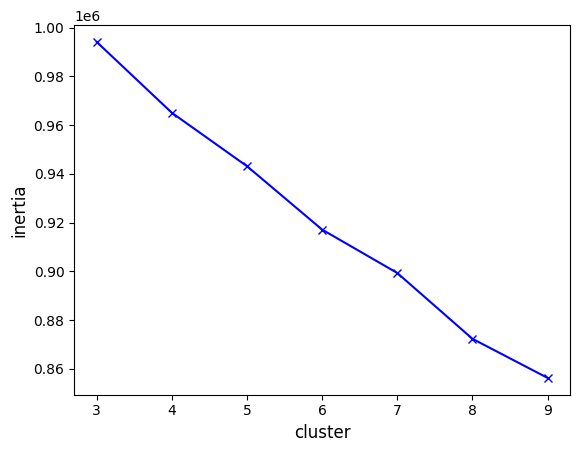

In [32]:
def get_inertia (cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(3,10):
    inertia.append(get_inertia(cluster_num, X_sc))

plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)    
plt.plot([i for i in range (3,10)], inertia, 'xb-')

In [33]:
from sklearn.metrics import silhouette_score
import seaborn as sns

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packa

<Axes: xlabel='cluster', ylabel='silhouette'>

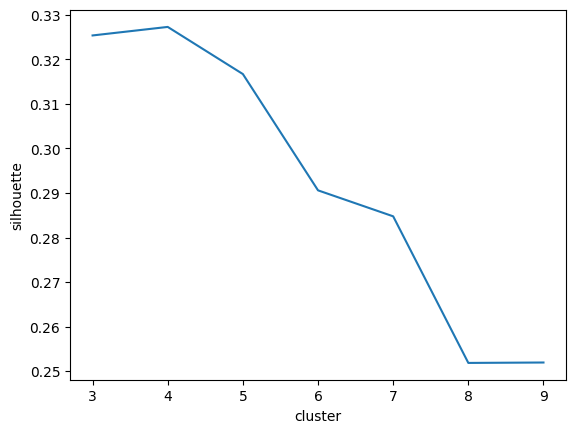

In [34]:
def get_silhouette (cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {'silhouette':[], 'cluster':[]}
for cluster_num in range(3,10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X_sc))
    silhouette_res['cluster'].append(cluster_num)
silhouette_df = pd.DataFrame(silhouette_res)
sns.lineplot(data=silhouette_df, x='cluster', y='silhouette', markers='o')


In [37]:
k_means_2 = KMeans(n_clusters=3, random_state=42)
k_means_2.fit(X_sc)
predict = k_means_2.predict(X_sc)
prediction = k_means_2.labels_
df['clusters'] = prediction

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
top_list = []
for clusters, group in df.groupby('clusters'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

In [39]:
from sklearn.mixture import GaussianMixture

In [46]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_sc)
predict_gm = gm.predict(X_sc)
np.unique(predict, return_counts=True)

(array([0, 1, 2]), array([22925,  5942,  1133], dtype=int64))

In [47]:
a = np.where(predict == 2)
df.iloc[a]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,clusters
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,2
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,2
57,0,0,0,0,0,0,0,1,0,0,...,2,1,1,0,0,1,0,0,2,2
62,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29877,0,1,0,1,0,0,1,1,0,0,...,1,1,2,0,0,0,0,2,0,2
29891,1,0,1,1,0,0,0,0,0,0,...,1,1,0,0,0,3,0,0,0,2
29914,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,16,3,0,0,2
29915,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,3,0,0,0,2
